# Bidirectional Encoder Representations from Transformers (BERT)
- Here is the [[BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)](https://arxiv.org/abs/1810.04805) fully detailing what a BERT is; This model was developed by Google AI
    - "BERT is  designed  to  pre-train  deep  bidirectional  representations  from unlabeled text by jointly conditioning on both left  and  right  context  in  all  layers." - arXiv:1810.04805v2
- BERT is an innovative architecture that lead to substantial improvement in the <b> natural language inference, question answering, sentiment analysis, text summarization, Next Sentence Prediction and so many other fields! </b>

# BERT Pro's and its succession to LSTM
- You can think of BERT as the successor to LSTM; [Check out my video on LSTM!](https://www.youtube.com/watch?v=rmxogwIjOhE)
    - Drawbacks of LSTM's
            - Slow to Train
                - Considers words in sequential order (not parallel)
            - Not "really" bi-directional since LSTM has different "gates" that executes that logic (but some is lost)
- Different BERT models of varying sizes from the paper [linked in this github](https://github.com/google-research/bert)

### <center> LSTM Architecture </center>
![LSTM](LSTM.png)

# BERT Architecture
- The BERT architecture is a multi-layer bidrectional transformer encoder; Here is a [video](https://www.youtube.com/watch?v=X0tB-J8_TS4) and [github link](https://github.com/SpencerPao/Natural-Language-Processing/tree/main/Transformers)
    - So it is <b> literally </b> taking the transformer encoder and stacking the encoders on top of each other!
        - The BERT base architecture has 12 encoder blocks, 12 multi-attention heads, and 110 million parameters
        - The BERT large architecture has 24 enoder blocks, 16 multi-attention heads, and 340 million parameters

Image locations came from: <b> [Attention Is All You Need](https://arxiv.org/abs/1706.03762) </b>

Encoder Block             |  Attention Framework
:-------------------------:|:-------------------------:
<img src="Encoder.png" width="300" height="450"> |  <img src="Attention.png" width="600" height="900">



# How are BERT's Trained?

There are two steps in this framework.

### Pre-training
The BERT model is trained on unblabeled data over different pre-training tasks. This is how the BERT architecture understands the language and context.
It accomplishes this in two ways:
- Masked Languaged Model (MLM)
    - This just masks words and attempts to predict what word would fit in the masked term.
    - Original Sentence: "Make sure to like and subscribe!"
    - Masking: "Make sure to <b>[MASK1]</b> and <b>[MASK2]</b>"
    - The Model then attempts to predict what the <b>[MASK1]</b> and <b>[MASK2]</b> by plugging in terms.
- Next Sentence Prediction (NSP)
    - Similarly to the MLM process, the NSP process attempts to predict the next sentence. (and if the next sentence is actually what it is said to be)
    - Original Sentences: 
        - <b> Prior Sentence </b>: "Make sure to like and subscribe!"
        - <b> Post Sentence </b>: "I just hit the like button with notificatons and subscribe button!"
    - Does the post sentence follow the prior sentence?
    
In industry, you will typically utilize an already existing BERT model that has an already pretrained corpus with its distinct vocabulary and either use the model out of the box or go straght to the fine-tuning phase with your training data.

# Overview for pre-training:
- Train BERT using NSP and MLM
    - Every word in sentence returns token embedding
    - Incorporate the segment and positional embeddings to account for ordering of inputs
    - Pass into BERT
    - Outputs word vectors for MLM and a binary value for NSP
    - Word vectors passed into a Softmax Layer with X neurons, where X = number of possible words in vocab
    - Compare with Cross Entropy Loss, thereby providing prediction for word.
<img src="Token_Embeddings.png" width="600" height="900">


### Fine-Tuning
The BERT model is initialized with the pre-trained parameters and then <b> all </b> the parameters are fine-tuned with labeled data. This is where the model utilizes the underlying understanding of language and context to attempt to solve a problem.
- Replace the output layer of BERT with a fully connected network layer where the number of neurons is the number of words for prediction (for QA type problems); the number of neurons can vary among what type of problem you are attempting to solve.
- This process is relatively fast to train since the only parameters that will be updated are the output layer parameters
    - The other parmaters (encoder blocks) won't change as dramatically
 


### BERT Structure for various NLP tasks
- Tok - is a token which is a word.
- E - Embeddings (pretrained embeddings from the pre-training step) -- These are vectors of same size
- C - Class Labels
- CLS - Classification Output (dependent variables : this can be a binary output for example)
- T - represents the contextual representation of a token

Image locations came from: [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805) and more information on how to approach your specific problem can be addressed there.
<img src="Fine_Tuned_Tasks.png" width="600" height="900">

# Overview for fine-tuning
- Provide supervised dataset and tune the neurons in the output layer

# Cool. Now, let's start applying BERT!
There are of course sooo many applications for BERT:
- Determine if a movie’s reviews are positive or negative
- Help chatbots answer questions
- Help predicts text when writing an email
- Can quickly summarize long legal contracts

Let's keep it simple and see how it can be applied with Sentiment Analysis! Now as you are probably aware, I have done a Sentiment Analysis Video [here](https://www.youtube.com/watch?v=CzRrD76pnVY) but with an LSTM. So, let's do the same with BERT!

We want to predict if the text has a POSITIVE or NEGATIVE sentiment associated.
- We are going to be conducting Sentiment Analysis.
- Please see <b> figure (d) single sentence </b> in the section: BERT Structure for various NLP tasks for architecture.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
# Reading in twitter data on sentiment. (NEGATIVE, POSITIVE for target)
# Already cleaned and preprocessed...
df = pd.read_csv('twitter_data.csv')
df = df.sample(frac=1).reset_index()
df = df.drop(['index'], axis = 1)
df

,target,ids,date,flag,user,text
0,NEGATIVE,1553734464,Sat Apr 18 15:04:05 PDT 2009,NO_QUERY,sono23,nice day work
1,NEGATIVE,1678151511,Sat May 02 05:42:21 PDT 2009,NO_QUERY,amel_melli,gonna thesis
2,NEGATIVE,1677758199,Sat May 02 03:49:42 PDT 2009,NO_QUERY,mel95,really tired
3,POSITIVE,1558763913,Sun Apr 19 09:20:06 PDT 2009,NO_QUERY,geehowquaint,serious vivacious spritely like little blonde ...
4,POSITIVE,1555848588,Sat Apr 18 20:52:13 PDT 2009,NO_QUERY,bhaddad,sweet
...,...,...,...,...,...,...
99995,POSITIVE,1551555296,Sat Apr 18 09:21:55 PDT 2009,NO_QUERY,leesteen,grandpa plays guitar hero concentration face
99996,NEGATIVE,1573417708,Tue Apr 21 01:04:28 PDT 2009,NO_QUERY,littledictator,know u feel vicky nearly get morning sunny stu...
99997,POSITIVE,1557307389,Sun Apr 19 03:17:26 PDT 2009,NO_QUERY,AusRob,1901st update trying decide go potential holid...
99998,NEGATIVE,1556691999,Sat Apr 18 23:54:14 PDT 2009,NO_QUERY,uberlou,uggggh 139 xbox 360 pro woot com wants ts


In [3]:
df.target.unique()

array(['NEGATIVE', 'POSITIVE'], dtype=object)

In [4]:
decode_map = {"NEGATIVE": 0, "POSITIVE": 1}
def decode_sentiment(label):
    return decode_map[(label)]
df.target = df.target.apply(lambda x: decode_sentiment(x))

In [5]:
df

,target,ids,date,flag,user,text
0,0,1553734464,Sat Apr 18 15:04:05 PDT 2009,NO_QUERY,sono23,nice day work
1,0,1678151511,Sat May 02 05:42:21 PDT 2009,NO_QUERY,amel_melli,gonna thesis
2,0,1677758199,Sat May 02 03:49:42 PDT 2009,NO_QUERY,mel95,really tired
3,1,1558763913,Sun Apr 19 09:20:06 PDT 2009,NO_QUERY,geehowquaint,serious vivacious spritely like little blonde ...
4,1,1555848588,Sat Apr 18 20:52:13 PDT 2009,NO_QUERY,bhaddad,sweet
...,...,...,...,...,...,...
99995,1,1551555296,Sat Apr 18 09:21:55 PDT 2009,NO_QUERY,leesteen,grandpa plays guitar hero concentration face
99996,0,1573417708,Tue Apr 21 01:04:28 PDT 2009,NO_QUERY,littledictator,know u feel vicky nearly get morning sunny stu...
99997,1,1557307389,Sun Apr 19 03:17:26 PDT 2009,NO_QUERY,AusRob,1901st update trying decide go potential holid...
99998,0,1556691999,Sat Apr 18 23:54:14 PDT 2009,NO_QUERY,uberlou,uggggh 139 xbox 360 pro woot com wants ts


In [11]:
for txt in df.text:
    print(txt)
    break

nice day work


C:\Users\Spenc\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


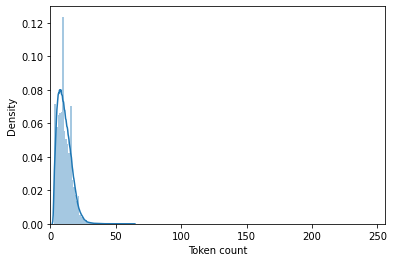

In [19]:
token_lens = []
for txt in df.text:
    tokens = tokenizer.encode(str(txt), max_length=512)
    token_lens.append(len(tokens))
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count'); #100 seems to be a solid threshold for the token length.

In [6]:
# Remember that I did a lot of precleaning to get the dataframe in this state. If you are curious on how I did that,
# the Sentiment Analysis video is here: https://www.youtube.com/watch?v=CzRrD76pnVY&t=785s
df.target.value_counts()

0    50000
1    50000
Name: target, dtype: int64

# Documentation
- HuggingFace Documentation for this function we will use: [TFBertForSequenceClassification](https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification)

In [25]:
'''Load in our models and important packages...'''
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# we'll use the base model uncased since Text is lowercased. (uncased just lowercases all incoming raw text)
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

### BERT can't just accept raw text. We have to:
- Add special tokens to separate sentences for classification
- pass sequences of equal length with padding
    - padd with zeroes = pad token and ones = real tokens
    
### Important Tokens and Features for BERT
- Special tokens: ([SEP],102) - The marker for the end of a sentence
- Classification: ([CLS],101) - Add this token to the beginning of the sentence so BERT knows we are doing classification
    - Add a linear layer at the end of the model if you have a regression task
- Padding: ([PAD],0)
- Unknown tokens: ([UNK],100)

In [29]:
class SentimentDataset(Dataset):

    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
          review,
          add_special_tokens=True, # Add [CLS] and [SEP]
          max_length=self.max_len,
          return_token_type_ids=False,
          pad_to_max_length=True, # Adding [PAD] to fit max_len
          return_attention_mask=True,
          return_tensors='pt', # returns PyTorch tensors
        )

        return {
          'review_text': review,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
        }

In [39]:
# 60%, 20%, 20% split for train, val, test
df_train, df_val, df_test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))]) 

In [35]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = SentimentDataset(reviews=df.text.to_numpy(),
                         targets=df.target.to_numpy(),
                         tokenizer=tokenizer,
                         max_len=max_len)

    return DataLoader(ds,
                      batch_size=batch_size,
                      num_workers=4)

In [40]:
BATCH_SIZE = 16
MAX_LEN = 100
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
# Example Batch
data = next(iter(train_data_loader))
data.keys()

In [ ]:
# https://www.geeksforgeeks.org/sentiment-classification-using-bert/